(nm_euler_method)=
# Euler method
```{index} Euler method
```
[Euler Method](Euler_method) is one of the simplest schemes to solve ODEs. 

We will use this method to solve the equation:

\\[
u'(t)=f(u(t),t),\\\\\\
u(t_0)=u_0.\\]

To explain this method, let's begin with the Taylor series. In this case, we could write:

\\[ u(t+\Delta t)=u(t)+\Delta t u'(t) + O(\Delta t^2).\\]

Using the definition of our ODE above, we can substitute in for \\(u'(t)\\). In this case, we know that \\(u'(t) =f(u(t),t)\\)  and we obtain:

\\[ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t)+ O(\Delta t^2).\\]

Notice that the value of \\(u\\) used in the evaluation of \\(f\\) is that at time \\(t\\). By dropping the \\(O(\Delta t^2)\\) since it is very small, we can obtain 

\\[ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t).\\]

Note that dropping the \\(O(\Delta t^2)\\) causes us to lose some values, which results in Euler method being only 1st order accurate. This loss of value is referred to as the truncation error. 

Euler method is known as an explicit method, because the function \\(f\\) in this relation is evaluated at the old time level \\(t\\), i.e. we have all the information required at time \\(t\\) to explicitly compute the right-hand-side,
and hence easily find the new value for \\(u(t+\Delta t)\\).

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

\\[ u'(t)=u(t),\\\\\\
u(0)=1.\\]

We know that at \\(t = 0\\), \\(u(t=0) = 1\\). We also know that \\(u'(t)=u(t)\\) and thus \\(u'(t=0)=u(t=0)\\).

Since \\(u(t=0)=1\\), then \\(u'(t=0) = 1\\). We can use that to substitute to the Euler scheme.

To obtain \\(u(t+\Delta t)\\), we have timestep \\(\Delta t = 0.05\\) and \\(u(t=0) = 1\\) and \\(u'(t=0) = 1\\):

\\[u(t+\Delta t)=u(t)+ \Delta t f(u(t),t).\\]

We know that the solution to this equation is \\(u(t)=e^t\\), but let's ignore that for one moment and evaluate \\(u(0.1)\\) using Euler's method with steps of \\(0.05\\). The first step is:

\\[u(0.05)\approx u(0)+0.05u'(0)\approx 1+0.05\times 1 =1.05.\\]

Here, we found that \\(u\\) is 1.05, but actually \\(e^{0.05} = 1.05127\\), thus we have more than the actual value by a small percentage of 0.12%. This 0.12% error comes from the truncation error from us dropping \\(O(\Delta t^2)\\) from our calculation.

Now that we know \\(u(0.05)\\), we can calculate the second step. We know that at \\(t = 0.05\\), \\(u(t=0.05) = 1.05\\)

We also know that \\(u'(t)=u(t)\\) and thus \\(u'(t=0.05)=u(t=0.05)\\).

Since \\(u(t=0.05)=1.05\\), then \\(u'(u = 1.05, t=0.05) = 1.05\\).

We can then use what we obtained to substitute into the Euler scheme. To obtain \\(u(t+\Delta t)\\), we have timestep \\(\Delta t = 0.05\\) and \\( u(t=0.05) = 1.05\\) and \\(u'(u=1.05, t=0.05) = 1.05\\):

\\[u(0.1)\approx u(0.05)+0.05u'(0.05)=1.05+.05\times1.05=1.1025.\\]

Now the actual value of \\(e^{0.1}\\) is around \\(1.1051\\) so we're 0.236% higher and only 2 steps into the algorithm. The 0.236% comes from the truncation error when we went from 0 to 0.05, and the truncation error when we went from 0.05 to 0.10. Note that the truncation errors are compounded. The truncation error from 0 to 0.05 will result in greater truncation error when going from 0.05 to 0.10. These truncation errors are cumulative, and old truncation errors result in greater new truncation errors, which makes them quickly become rather significant. 

The formula given is used to calculate the value of \\(u(t)\\) one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time \\(T\\) then we will have to calculate \\((T-t_0)/h\\) steps of the method, since the distance from \\(T\\) to \\(t_0\\) is \\(T-t_0\\) and the length of each step is \\(h\\). This sum over \\(O(1/\Delta t)\\) steps results in a global truncation error for Euler's method of \\(O(\Delta t)\\).

In other words, Euler's method is only **1st order accurate** - if we halve \\(\Delta t\\) we will need to do double the amount of work and the error should correspondingly halve.

## Implementation

We will write a function `euler(f,u0,t0,t_max,dt)` that takes as arguments the function \\(f(u,t)\\) on the RHS of our ODE,
an initial value for \\(u\\), the start and end time of the integration, and the time step.

We will use it to integrate the following ODEs up to time \\(t=10\\)

\\[u'(t)=u(t),\quad u(0)=1\\]

and 

\\[u'(t)=\cos(t),\quad u(0)=0\\]

and plot the results.

First let's define the functions:

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0
    # These lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[u0]; t_all=[t0]
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f1(u,t):
    val = u
    return val

def f2(u,t):
    val = np.cos(t)
    return val

Plot the results for the first ODE:

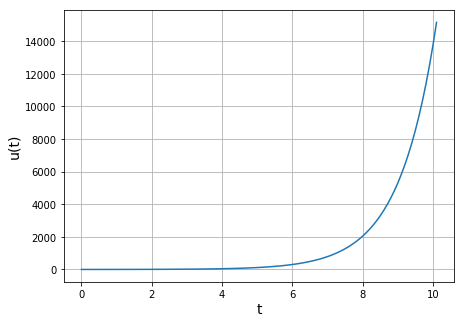

In [17]:
(u_all,t_all) = euler(f1,1.0,0.0,10.0,0.1)

# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.plot(t_all, u_all)
ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('u(t)', fontsize=14)
ax1.grid(True)

plt.show()

Plot results for the second ODE:

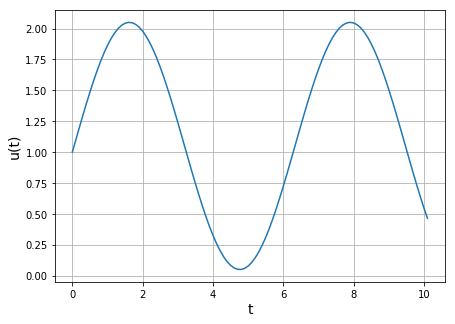

In [18]:
(u_all,t_all) = euler(f2,1.0,0.0,10.0,0.1)

# Set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.plot(t_all, u_all)
ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('u(t)', fontsize=14)
ax1.grid(True)

plt.show()